In [61]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st
import tensorflow as tf 
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [62]:
def grafico_qualitativa(var,dataframe,titulo, ax=None):
     var_counts = dataframe[var].value_counts().head(10)
     var_percentage = dataframe[var].value_counts(normalize=True).head(10)*100
     percent = var_percentage.values
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var}).head(10)
     display(dados_qualitativa)
     
   
     plt.figure(figsize=(12, 6))
     bars = plt.bar(var_counts.index, percent)
     plt.xlabel('Categorias')
     plt.xticks(rotation=90)
     plt.ylabel('Frequência em porcentagem')
     plt.ylim(0, 100)
     plt.title(f'Gráfico da Frequência:{titulo}')
       
     for bar, pct, count in zip(bars, percent, var_counts):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 2, f"n={count}\n({pct:.2f}%)", ha='center')
     plt.show()
     plt.close()
     
def distribuição_de_Frequência(varName,dataframe):
    x = dataframe[varName]
    freq = x.value_counts(bins=20, 
                            sort=False)
    display(pd.DataFrame(freq))

def histograma(varName, dataframe):
    x = dataframe[varName]
    distribuição_de_Frequência(varName,dataframe)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=20, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()
    
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

def QualiQualiAssociation(varName1, varName2, dataframe, ax=None):
    # Calcular as frequências das categorias
    freq_varName1 = dataframe[varName1].value_counts().nlargest(30)
    freq_varName2 = dataframe[varName2].value_counts().nlargest(30)
    
    # Filtrar o DataFrame para incluir apenas as 15 categorias mais frequentes em ambas as variáveis
    filtered_df = dataframe[
        dataframe[varName1].isin(freq_varName1.index) & 
        dataframe[varName2].isin(freq_varName2.index)
    ]
    
    # Criar a tabela cruzada
    SQ_tb = pd.crosstab(index=filtered_df[varName1], columns=filtered_df[varName2], normalize="index")

    # Título do gráfico
    title = f"{varName2} per {varName1}"
    print(f" ----------------- {title} ----------------- ")
    display(SQ_tb)
    
    # Configurar o gráfico
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
        
    image = SQ_tb.plot(kind="bar", figsize=(12, 4), stacked=False, title=title, fontsize=12, ax=ax)
    image.set_ylabel("Counts")
    image.set_xlabel(varName1)
    
    plt.show()

def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    return moda     

def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variavel": key ,"Quantidade": len(data),"Media": [st.mean(data.dropna())], "Moda ": moda_czuber(data.dropna()), "Mediana": [st.median(data.dropna())], "Variancia": [st.variance(data.dropna())], "Desvio padrao": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())
    
def scater(varName1,varName2,dataframe,ax = None):
    if ax is None:
         _, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(dataframe[varName1], dataframe[varName2])
    title = varName1 + " per " + varName2
    ax.set_title(title)
    ax.set_xlabel(varName1)
    ax.set_ylabel(varName2)    


In [63]:
nome_arquivo_csv = 'desafio_indicium_imdb.csv'
dados = pd.read_csv(nome_arquivo_csv)

In [64]:
dados.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [65]:
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Qual filme você recomendaria para uma pessoa que você não conhece?  

Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?   

Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?  

,Genre,Frequência
0,Drama,0.084084
1,"Drama, Romance",0.037037
2,"Comedy, Drama",0.035035
3,"Comedy, Drama, Romance",0.031031
4,"Action, Crime, Drama",0.030030
5,"Biography, Drama, History",0.028028
6,"Crime, Drama, Thriller",0.028028
7,"Crime, Drama, Mystery",0.027027
8,"Crime, Drama",0.026026
9,"Animation, Adventure, Comedy",0.024024


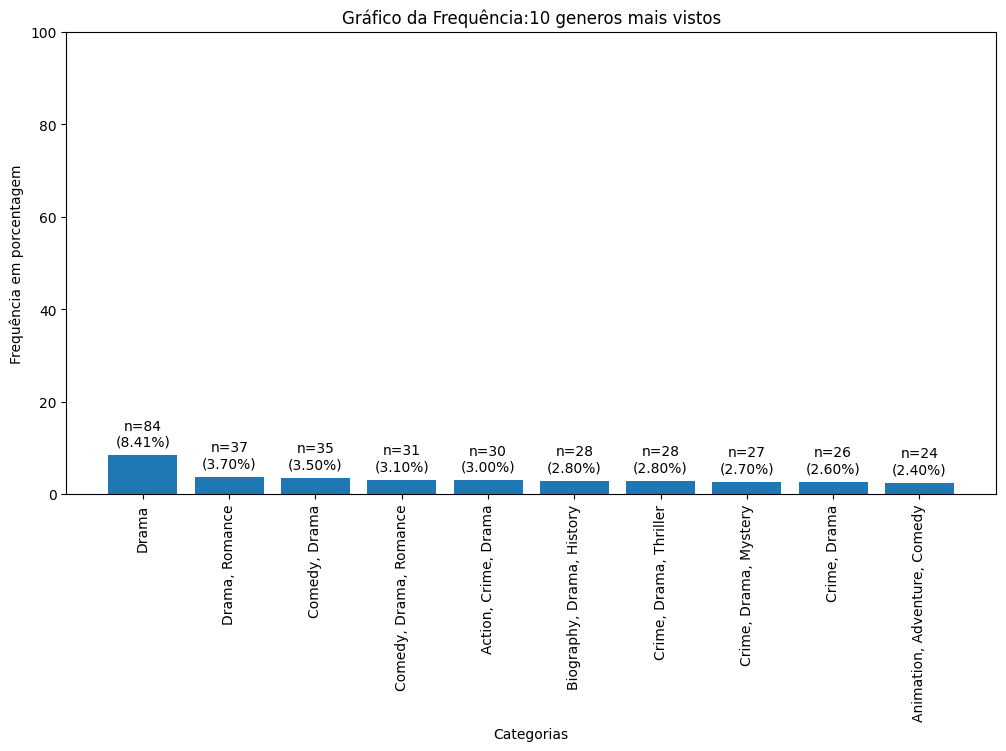

In [66]:
grafico_qualitativa("Genre",dados, ax=None, titulo="10 generos mais vistos")

,Certificate,Frequência
0,U,0.260579
1,A,0.218263
2,UA,0.194878
3,R,0.162584
4,PG-13,0.047884
5,PG,0.041203
6,Passed,0.037862
7,G,0.013363
8,Approved,0.012249
9,TV-PG,0.003341


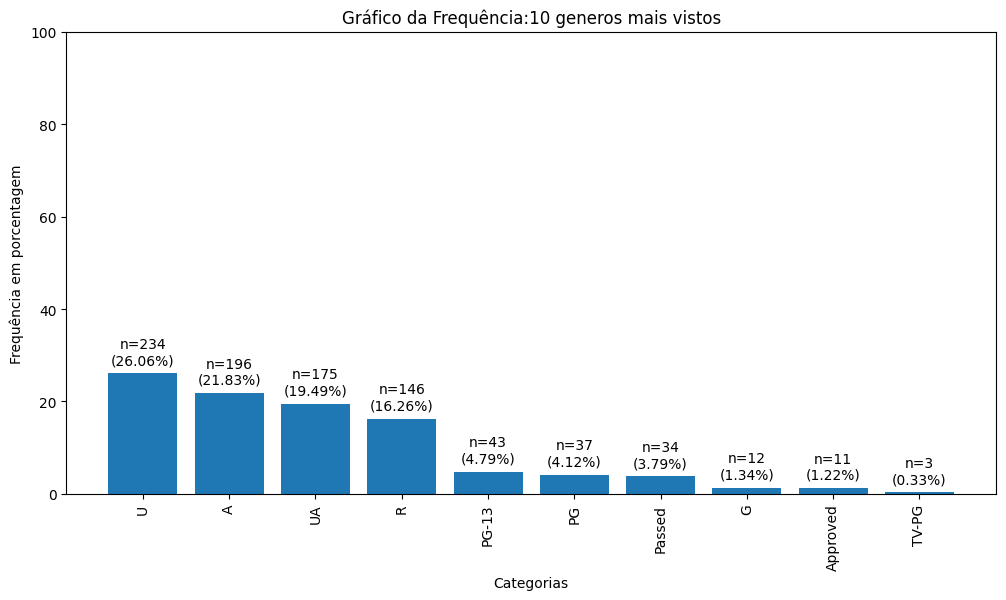

In [67]:
grafico_qualitativa("Certificate",dados, ax=None, titulo="10 generos mais vistos")

,count
"(27.927, 31.6]",2
"(31.6, 35.2]",1
"(35.2, 38.8]",1
"(38.8, 42.4]",2
"(42.4, 46.0]",5
"(46.0, 49.6]",8
"(49.6, 53.2]",16
"(53.2, 56.8]",11
"(56.8, 60.4]",25
"(60.4, 64.0]",41


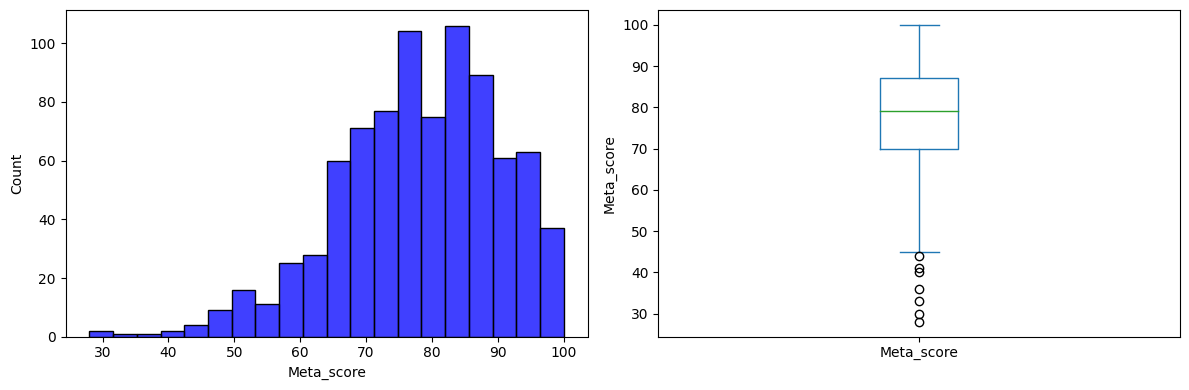

In [68]:
histograma("Meta_score", dados)

,count
"(7.5969999999999995, 7.68]",123
"(7.68, 7.76]",157
"(7.76, 7.84]",151
"(7.84, 7.92]",106
"(7.92, 8.0]",141
"(8.0, 8.08]",0
"(8.08, 8.16]",127
"(8.16, 8.24]",67
"(8.24, 8.32]",44
"(8.32, 8.4]",0


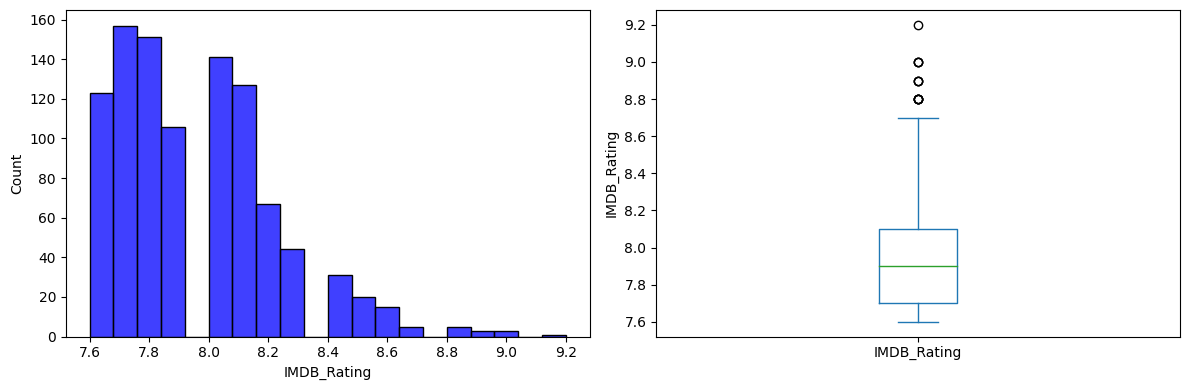

In [69]:
histograma("IMDB_Rating", dados)

In [70]:
dados['Rank_IMDB'] =pd.Series(len(dados)) 
for i in range(len(dados)):
    if dados['IMDB_Rating'][i] <= 8.0: 
        dados['Rank_IMDB'][i] = "Mediano"
    elif dados['IMDB_Rating'][i] <= 8.32:
        dados['Rank_IMDB'][i] = "Bom"
    elif dados['IMDB_Rating'][i]  <= 8.75:
        dados['Rank_IMDB'][i] = "Muito bom"
    elif dados['IMDB_Rating'][i]  <= 9.04:   
        dados['Rank_IMDB'][i] = "Excelente"
    else:   
        dados['Rank_IMDB'][i] = "Perfeito"
        
        
        
        
dados['Rank_IMDB'] = pd.Categorical(dados['Rank_IMDB'], 
                                    categories=['Mediano', 'Bom','Muito bom','Excelente','Perfeito'], 
                                    ordered=True)
dados['Rank_IMDB'].value_counts(sort=False)        

Rank_IMDB
Mediano      678
Bom          238
Muito bom     71
Excelente     11
Perfeito       1
Name: count, dtype: int64

 ----------------- Rank_IMDB per Certificate ----------------- 


Rank_IMDB,Mediano,Bom,Muito bom,Excelente,Perfeito
Certificate,,,,,
16,0.000000,1.000000,0.000000,0.000000,0.000000
A,0.622449,0.229592,0.117347,0.025510,0.005102
Approved,0.636364,0.363636,0.000000,0.000000,0.000000
G,0.583333,0.250000,0.166667,0.000000,0.000000
GP,0.500000,0.500000,0.000000,0.000000,0.000000
PG,0.729730,0.243243,0.027027,0.000000,0.000000
PG-13,0.906977,0.069767,0.023256,0.000000,0.000000
Passed,0.500000,0.441176,0.058824,0.000000,0.000000
R,0.787671,0.178082,0.034247,0.000000,0.000000


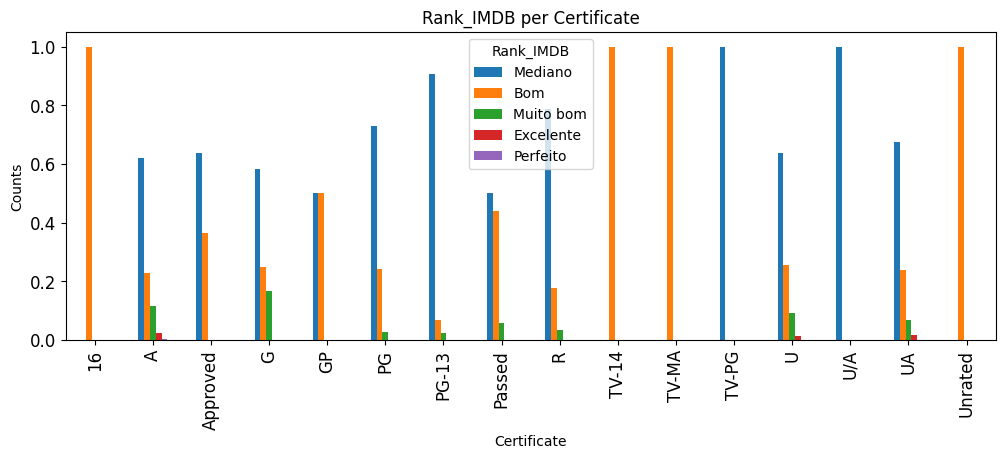

In [71]:
QualiQualiAssociation("Certificate", "Rank_IMDB",dados, ax=None)

In [72]:
dados["Genre"].value_counts()

Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

In [73]:

dados['Runtime'] = dados['Runtime'].str.split().str[0]

# Convertendo para tipo numérico
dados['Runtime'] = pd.to_numeric(dados['Runtime'])


,count
"(44.723, 58.8]",1
"(58.8, 72.6]",9
"(72.6, 86.4]",35
"(86.4, 100.2]",163
"(100.2, 114.0]",224
"(114.0, 127.8]",193
"(127.8, 141.6]",172
"(141.6, 155.4]",82
"(155.4, 169.2]",55
"(169.2, 183.0]",30


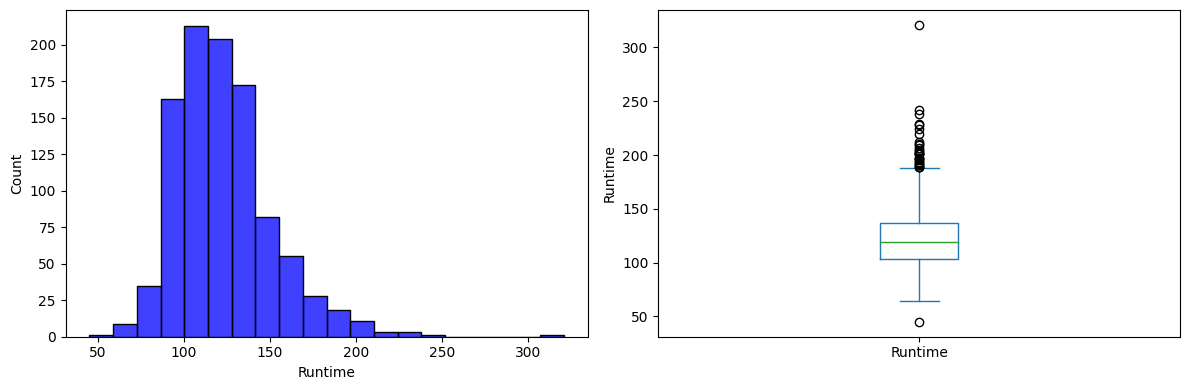

In [74]:
histograma("Runtime", dados)

In [75]:
dados['Time_Dur'] =pd.Series(len(dados)) 
for i in range(len(dados)):
    if dados['Runtime'][i] < 100.2: 
        dados['Time_Dur'][i] = "Curto"
    elif dados['Runtime'][i] <= 141.6:
        dados['Time_Dur'][i] = "Medio"
    else:   
        dados['Time_Dur'][i] = "Longo"
        
        
        
        
dados['Time_Dur'] = pd.Categorical(dados['Time_Dur'], 
                                    categories=['Curto', 'Medio','Longo'], 
                                    ordered=True)
dados['Time_Dur'].value_counts(sort=False)  

Time_Dur
Curto    208
Medio    589
Longo    202
Name: count, dtype: int64

 ----------------- Rank_IMDB per Time_Dur ----------------- 


Rank_IMDB,Mediano,Bom,Muito bom,Excelente,Perfeito
Time_Dur,,,,,
Curto,0.730769,0.230769,0.033654,0.004808,0.00000
Medio,0.718166,0.213922,0.066214,0.001698,0.00000
Longo,0.509901,0.316832,0.123762,0.044554,0.00495


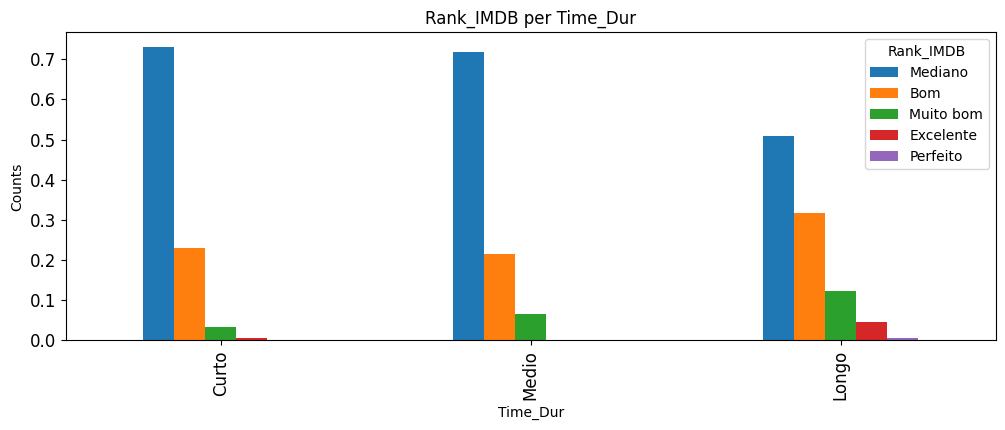

In [76]:
QualiQualiAssociation("Time_Dur", "Rank_IMDB",dados, ax=None)